# Python Homework 6

**Release date:** Monday, Feb 24th <br>
**Due date:** Friday, __Mar 6th__, 11:59 p.m. via GauchoSpace

**Instruction:** Please upload your file on GauchoSpace with filename "PythonHW6_YOURPERMNUMBER"; a pdf or html file.

__Background:__ In mathematical finance, Markov chains are used to model the default risk of a company or country (more specifically, the default of a company's or country's liability like a corporate or government bond - see e.g. PSTAT 171 and PSTAT 170). 

Rating agencies (like <i>Standard & Poor’s</i>, <i>Moody’s</i>, <i>Fitch</i>) rate the financial stability of a company and classify them according to different classes. A possible classification may range from 'AAA' for debitors with a very good credit rating to 'CCC' for debitors which are very likely to delay in paying a debt; and 'D' for those debitors which can't satisfy their financial liabilities anymore (in other words, they are default). 

The yearly credit rating of a company can be modeled as a Markov chain $(X_n)_{n=0,1,2,\ldots}$ with state space

$$ \mathcal{S} = \{ AAA,\, AA,\, A,\, BBB,\, BB,\, B,\, CCC,\, D \} $$

where $X_n$ represents the credit rating class of a company in the $n$-th year. The transition probabilities are given by

\begin{equation*}
\begin{array}{ccccccccc}
 & AAA & AA & A & BBB & BB & B & CCC & D \\
 AAA & 92.07 & 7.09 & 0.63 & 0.15 & 0.06 & 0.00 & 0.00 & 0.00 \\ 
 AA & 0.62 & 90.84 & 7.76 & 0.59 & 0.06 & 0.10 & 0.02 & 0.01 \\
 A & 0.05 & 2.09 & 91.38 & 5.79 & 0.44 & 0.16 & 0.04 & 0.05 \\
 BBB & 0.03 & 0.21 & 4.10 & 89.37 & 4.82 & 0.86 & 0.24 & 0.37 \\
 BB & 0.03 & 0.08 & 0.40 & 5.54 & 83.24 & 8.15 & 1.11 & 1.45 \\
 B & 0.00 & 0.08 & 0.27 & 0.34 & 5.39 & 82.41 & 4.92 & 6.59 \\
 CCC & 0.10 & 0.00 & 0.29 & 0.58 & 1.55 & 10.54 & 52.80 & 34.14 \\
 D & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 100.0
\end{array} 
\end{equation*}

<i>Remark</i>: For your implementations below, you can label the different states from $0$ to $7$, where $0$ represents state $AAA$, $1$ represents state $AA$, and so on.

As usual, we start with loading some packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1 (3 points)

1. Implement the transition probability matrix $P$ from above as a two dimensional <tt>numpy.array()</tt>.

In [2]:
P = np.array([[92.07,7.09,.63,.15,.06,0,0,0],
         [.62,90.84,7.76,.59,.06,.10,.02,.01],
        [.05,2.09,91.38,5.79,.44,.16,.04,.05],
         [.03,.21,4.1,89.37,4.82,.86,.24,.37],
        [.03,.08,.40,5.54,83.24,8.15,1.11,1.45],
         [0,.08,.27,.34,5.39,82.41,4.92,6.59],
        [.1,0,.29,.58,1.55,10.54,52.8,34.14],
         [0,0,0,0,0,0,0,100]])
P = P/100 # it is probability so it has to have the decimal point moved back 2 spaces
print(P)

[[9.207e-01 7.090e-02 6.300e-03 1.500e-03 6.000e-04 0.000e+00 0.000e+00
  0.000e+00]
 [6.200e-03 9.084e-01 7.760e-02 5.900e-03 6.000e-04 1.000e-03 2.000e-04
  1.000e-04]
 [5.000e-04 2.090e-02 9.138e-01 5.790e-02 4.400e-03 1.600e-03 4.000e-04
  5.000e-04]
 [3.000e-04 2.100e-03 4.100e-02 8.937e-01 4.820e-02 8.600e-03 2.400e-03
  3.700e-03]
 [3.000e-04 8.000e-04 4.000e-03 5.540e-02 8.324e-01 8.150e-02 1.110e-02
  1.450e-02]
 [0.000e+00 8.000e-04 2.700e-03 3.400e-03 5.390e-02 8.241e-01 4.920e-02
  6.590e-02]
 [1.000e-03 0.000e+00 2.900e-03 5.800e-03 1.550e-02 1.054e-01 5.280e-01
  3.414e-01]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.000e+00]]


2. Provide the probability vector for the transition probabilities from state 3 to all other states 0, 1, 2,..., 7

In [3]:
print(P[3,])

[3.000e-04 2.100e-03 4.100e-02 8.937e-01 4.820e-02 8.600e-03 2.400e-03
 3.700e-03]


3. Use suitable Matrix operations to <u>compute the probability</u> that a company which is rated with 'AAA' today will <u>not</u> default during the next 8 years. 

In [4]:
powers = np.linalg.matrix_power(P,8)
probability = 1 - powers[0,7]
print(probability)

0.9982299711480223


## Problem 2 (4 points)

Write a function called <tt>simulateRating(...)</tt> which simulates the Markov chain. 

Input:
* <tt>startRating</tt>: Initial state of the Markov chain at time 0
* <tt>numberOfSteps</tt>: Number of steps $n$
* <tt>P</tt>: Transition matrix

Output:
* <tt>samplePath</tt>: An array of length $n$ with the values $X_0, X_1, \ldots, X_n$.

In [5]:
def simulateRating(startRating,numberOfSteps,P):
    go = [startRating]
    step = P[startRating]
    
    for n in range(numberOfSteps):
        after = np.random.choice(8,p = step)
        go.append(after)
        step = P[after]
    return go
   ## HINT: USE np.random.choice()

In [6]:
## TEST YOUR FUNCTION HERE
simulateRating( startRating = 0, numberOfSteps = 10, P = P)

[0, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3]

## Problem 3 (3 points)

Write a code to simulate and plot <tt>numPaths = 5</tt> simulated paths of length <tt>lengthPath = 100</tt> with staring value <tt>startRating = 2</tt> in one plot.

In [9]:
numPaths = 5
lengthPath = 100
startRating = 2
def Simulation(startRating, lengthPath, numPaths, P):
    sample = []
    for i in range(numPaths):
        sample.append(simulateRating(startRating, lengthPath, P))
    return sample
# ADD SOME COMMENTS TO YOUR CODE!

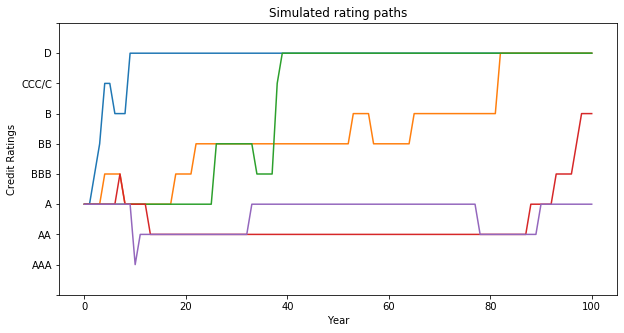

In [11]:
# COMPLETE/MODIFY THE PLOT COMMANDS ACCORDINGLY
def plotPaths(startRating, lengthPath, numPaths, P):
    plt.figure( figsize=( 10, 5 ) )
    
    simPaths = Simulation(startRating, lengthPath, numPaths, P)
    for path in simPaths:
        plt.plot(np.arange(lengthPath+1), path)
    
    plt.title('Simulated rating paths')
    plt.ylabel('Credit Ratings')
    plt.xlabel('Year')
    plt.ylim( -1, 8 )
    ratings = [ '', 'AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC/C', 'D', '' ]
    plt.yticks( range( -1, 9 ), ratings )
    plt.show()

plotPaths(startRating, lengthPath, numPaths, P)